In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import nltk

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\amrit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amrit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\amrit\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Loading Dataset

In [6]:
df = pd.read_csv('../data/dataset.csv')
df.head()

,Expense,Label
0,I spent Rs 110 on a chicken burger today.,Food
1,Today's snack was Rs 10 for a banana.,Food
2,Dinner cost me Rs 300 for a delicious pizza.,Food
3,Chicken Biryani set me back Rs 200.,Food
4,I indulged in Rs 100 worth of chicken biryani.,Food


### Text Processing

In [7]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Text preprocessing
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text.lower())  # Tokenization and lowercasing
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha()]  # Lemmatization
    tokens = [token for token in tokens if token not in stop_words]  # Removing stop words
    return ' '.join(tokens)

df['Expense'] = df['Expense'].apply(preprocess_text)

### Split data into train and test sets

In [8]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['Expense'], df['Label'], test_size=0.2, random_state=42)

### Vectorize text data

In [9]:
# Vectorize text data
vectorizer = TfidfVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

### Train a classifier

In [10]:
# Train a classifier
classifier = MultinomialNB()
classifier.fit(X_train_vectors, y_train)

MultinomialNB()

### Save the Model

In [11]:
import pickle
# Save the trained model to a file
with open('../models/exp_classifier.pkl', 'wb') as f:
    pickle.dump(classifier, f)

### Saving the Vectorizer

In [18]:
import pickle
# Assuming vectorizer is your TfidfVectorizer object
with open('../models/tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

### Loading  the Model

In [12]:
import pickle
# Load the trained model from the file
with open('../models/exp_classifier.pkl', 'rb') as f:
    classifier = pickle.load(f)

### Evaluate the classifier

In [13]:
# Evaluate the classifier
predictions = classifier.predict(X_test_vectors)
print(classification_report(y_test, predictions))

               precision    recall  f1-score   support

        Bills       1.00      1.00      1.00         6
     Clothing       1.00      0.62      0.77         8
         Food       1.00      1.00      1.00         6
         Fuel       1.00      0.89      0.94         9
Subscriptions       1.00      1.00      1.00         8
       Travel       0.56      1.00      0.71         5

     accuracy                           0.90        42
    macro avg       0.93      0.92      0.90        42
 weighted avg       0.95      0.90      0.91        42



##### Accuracy

In [14]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9047619047619048


### Visualisation

##### Confusion Matrix

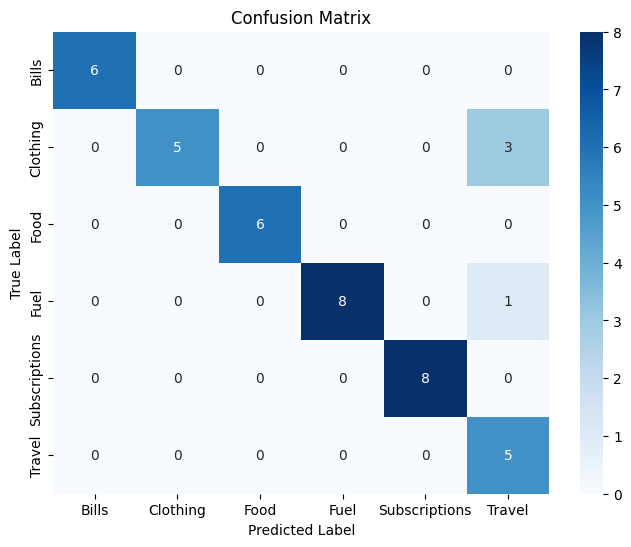

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

##### Inference
- The model performs well on identifying bills and clothing, with no instances being misclassified as something else.
- The model struggles most with differentiating between travel and subscriptions, frequently confusing the two.
- There are also some confusions between food and fuel, as well as subscriptions and other categories.

### User Input

In [16]:
def preprocess_input_text(text):
    # Preprocess the input text
    preprocessed_text = preprocess_text(text)
    # Vectorize the preprocessed text
    text_vector = vectorizer.transform([preprocessed_text])
    return text_vector

def classify_input(text):
    # Preprocess and vectorize the input text
    text_vector = preprocess_input_text(text)
    # Classify the input text using the trained model
    predicted_label = classifier.predict(text_vector)
    return predicted_label[0]

# Input text message
input_text = input("Enter your expense message: ")
# Classify the input text
predicted_label = classify_input(input_text)
print("Predicted Label:", predicted_label)

Enter your expense message:  Subscribed to Amazon prime for 699


Predicted Label: Subscriptions
